# Проект: Исследование стартапов

Автор: Андриив Ирина  
Дата: 10.06.2025

## Введение

**Цель проекта:**  
Провести предобработку и исследовательский анализ предложенных данных для ответов на вопросы заказчика о перспективных стартапах.

**Задачи:**
1. Изучить полученные данные
2. Провести предобработку данных  
3. Провести исследовательский анализ данных для ответа на вопросы заказчика
4. Подготовить общие выводы и рекомендации по итогам работы



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия основных файлов, используемых в анализе:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


### 1.1. Вывод общей информации, исправление названия столбцов


In [1]:
# Загрузим необходимые для анализа библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгрузим данные датасетов

acquisition = pd.read_csv(...)
company_and_rounds = pd.read_csv(...)
people = pd.read_csv(...)
education = pd.read_csv(...)
degrees = pd.read_csv(...)

In [3]:
# Проверим названия столбцов в датасетах
# Создадим переменные с названиями датасетов и самими датасетами
names = ['acquisition', 'company_and_rounds', 'people', 'education', 'degrees']
datasets = [acquisition, company_and_rounds, people, education, degrees]
# Выведем названия датасетов и соответствующие им столбцы
for name, dataset in zip(names, datasets):
    print(f'Названия столбцов датасета {name}:')
    display(dataset.columns)

Названия столбцов датасета acquisition:


Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

Названия столбцов датасета company_and_rounds:


Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

Названия столбцов датасета people:


Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Названия столбцов датасета education:


Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

Названия столбцов датасета degrees:


Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Согласно полученным данным:
- названия столбцов датасета **acquisition** соответсвуют единому стилю написания snake case  
- названия столбцов датасета **company_and_rounds** не соответсвуют единому стилю написания snake case и требуют внесения изменений. Также важно отметить, что в датасете присутствуют 2 столбца с названием  company id.   
- названия столбцов датасета **people** соответсвуют единому стилю написания snake case  
- названия столбцов датасета **education** соответсвуют единому стилю написания snake case  
- названия столбцов датасета **degrees** соответсвуют единому стилю написания snake case  

In [4]:
# Приведем названия столбцов датасета company_and_rounds к единообрзному виду
company_and_rounds = company_and_rounds.rename(columns = {'company  ID':'company_id', 
                                                          'category  code':'category_code', 
                                                          'founded  at':'founded_at',
                                                          'closed  at':'closed_at', 
                                                          'network  username':'network_username', 
                                                          'country  code':'country_code',
                                                          'investment  rounds':'investment_rounds', 
                                                          'funding  rounds':'funding_rounds', 
                                                          'funding  total':'funding_total', 
                                                          'funding  round  id':'funding_round_id', 
                                                          'company  id':'company_id_2', 
                                                          'funded  at':'funded_at',
                                                          'funding  round  type':'funding_round_type', 
                                                          'raised  amount':'raised_amount', 
                                                          'pre  money  valuation':'pre_money_valuation',
                                                          'is  first  round':'is_first_round', 
                                                          'is  last  round':'is_last_round'
    
})

In [5]:
# Выведем инфо о каждом датасете и первые 5 строк
for name, dataset in zip(names, datasets):
    print(f'Инфо о датасете {name}:')
    dataset.info()
    display(dataset.head())

Инфо о датасете acquisition:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Инфо о датасете company_and_rounds:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Инфо о датасете people:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Инфо о датасете education:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Инфо о датасете degrees:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Согласно первичному анализу данных:  
- датасет **acquisition** включает 9407 строк и 6 столбцов. Пропущенные значения присутстуют в столбцах term_code, acquired_at. Тип данных столбца acquired_at (object) следует поменять на datetime64  
- датасет **company_and_rounds** включает 217774 строк и 22 столбца. Пропущенные значения присутствуют в каждом столбце датасета. Типы данных столбцов founded at,	closed at, funded at следует поменять на datetime64  
- датасет **people** включает 226709 строк и 5 столбцов. Пропущенные значения присутствуют в столбцах first_name, last_name, company_id, network_username. Типы данных соответствуют.  
- датасет **education** включает 109610 строк и 4 столбца. Пропущенные значения присутствуют в столбцах instituition,  graduated_at. Тип данных столбца  graduated_at следует заменить на  datetime64.  
- датасет **degrees** включает 109610 строк и 4 столбца. Пропущенные значения пристутствуют в столбцах degree_type, subject. Типы данных соответствуют  

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [6]:
# Преобразуем тип данных в столбце acquired_at датасета acquisition к типу datetime64
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])
acquisition.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [7]:
# Преобразуем тип данных в столбцах founded_at, closed_at, funded_at датасета company_and_rounds к типу datetime64
# Сохраним назвния столбцов для преобразования в переменную
date_columns = ['founded_at', 'closed_at', 'funded_at']

# Создадим цикл для преобразования
for col in date_columns:
    company_and_rounds[col] = pd.to_datetime(company_and_rounds[col])

# Проверим преобразование типов
company_and_rounds.dtypes

company_id                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_2                  float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [8]:
# Преобразуем тип данных в столбце graduated_at датасета education к типу datetime64
education['graduated_at'] = pd.to_datetime(education['graduated_at'])
education.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [9]:
# Выведем информацию о пропусках в датасетах
for name, dataset in zip(names, datasets):
    print(f'Датасет {name}:')
    print(f'Пропуски в столбцах в абсолютных значениях')
    display(dataset.isna().sum())
    print(f'Пропуски в столбцах в относительных значениях')
    display(dataset.isna().mean()*100)

Датасет acquisition:
Пропуски в столбцах в абсолютных значениях


id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

Пропуски в столбцах в относительных значениях


id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

Датасет company_and_rounds:
Пропуски в столбцах в абсолютных значениях


company  ID                 302
name                        302
category  code            73888
status                      302
founded  at              107818
closed  at               214325
domain                    70615
network  username        122240
country  code            109167
investment  rounds          302
funding  rounds             302
funding  total              302
milestones                  302
funding  round  id       164846
company  id              164846
funded  at               165094
funding  round  type     164846
raised  amount           164846
pre  money  valuation    164846
participants             164846
is  first  round         164846
is  last  round          164846
dtype: int64

Пропуски в столбцах в относительных значениях


company  ID               0.138676
name                      0.138676
category  code           33.928752
status                    0.138676
founded  at              49.509124
closed  at               98.416248
domain                   32.425818
network  username        56.131586
country  code            50.128574
investment  rounds        0.138676
funding  rounds           0.138676
funding  total            0.138676
milestones                0.138676
funding  round  id       75.695905
company  id              75.695905
funded  at               75.809784
funding  round  type     75.695905
raised  amount           75.695905
pre  money  valuation    75.695905
participants             75.695905
is  first  round         75.695905
is  last  round          75.695905
dtype: float64

Датасет people:
Пропуски в столбцах в абсолютных значениях


id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

Пропуски в столбцах в относительных значениях


id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

Датасет education:
Пропуски в столбцах в абсолютных значениях


id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

Пропуски в столбцах в относительных значениях


id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

Датасет degrees:
Пропуски в столбцах в абсолютных значениях


id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

Пропуски в столбцах в относительных значениях


id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

Согласно полученным данным:  
- в датасете **acquisition** наиболее критическое количество пропусков содержит столбец term_code (7576 или 80% пропусков). Вероятноее всего, провести анализ с использованием этого столбца (то есть анализ вариантов расчёта) не удастся ввиду неполноты данных.  Столбец acquired_at содержит незначительное количество пропусков (0,3%), пропуски в этом столбце можно игнорировать.  
- в датасете **company_and_rounds** пропущенные значения пристутствуют в каждом столбце. В ряде столбцов (company_id, name, status, investment_rounds, funding_rounds, funding_total, milestones) количество пропусков незначительно(302 пропуска, 0,14% от общего количества строк). Такие пропуски можно игнорировать. Для следующих столбцов количество пропусков составляет довольно высокий процент: category_code (34%), founded_at(49,5%), closed_at(98%), domain(32%), network_username(56%), country_code(50%), funding_round_id(76%), company_id(76%), funded_at(76%), funding_round_type(76%), raised_amount(76%), pre_money_valuation(76%), participants(76%), is_first_round(76%), is_last_round(76%). Пропуски в столбце closed_at могут быть связаны с тем, что данные о закрытии компании отсутстуют, то есть компания является действующей. Далее в столбцах, содержащих информацию о раундах и финансировании, содержится самое большое количество пропусков (порядка 76%). Эти пропуски могут объясняться тем, что компания не участвовала в финансировании. Таким образом, анализ данных показателей может быть проведен на имеющихся данных, однако результат может не отражать реальной картины, так как в анализ войдут только 24% от всего датасета. 
- в датасете **people** количество пропусков в столбцах first_name, last_name незначительно (0,002% и 0,0004% соответственно). Такие пропуски можно игнорировать. В столбцах company_id, network_username количество пропусков довольно высокое (85% и 83% соответственно). Это может говорить о том, что данные о фио сотрудников и практически не привязаны к данным о компании. Это может существенно усложнить анализ данных.
- в датасете **education** количество пропусков в стоблце instituition незначительно (0,05%), такие пропуски можно игнорировать. Также по имеющимся данным возможно провести анализ образования сотрудников. В столбце graduated_at количество пропусков довольно высокое (47%). Таким образом, даты получения образования могут быть оценены только для 53% сотрудников. Отсутствие даты получения образования также может означать наличие сотрудников-студентов или лиц с неоконченным образованием.
- в датасете **degrees** пропуски присутствуют в столбцах degree_type (10%), subject(26%). При наличии такого количества пропусков возможно провести дальнейший анализ данных.

In [11]:
# Проверим датасеты на наличие явных дублей
for name, dataset in zip(names, datasets):
    print(f'Датасет {name}:')
    display(dataset.duplicated().sum())

Датасет acquisition:


0

Датасет company_and_rounds:


0

Датасет people:


0

Датасет education:


0

Датасет degrees:


0

Явных дубликатов в датасетах не найдено

In [12]:
# Проверим уникальные значения в столбце с категориальными значениями в датасете acquisition
acquisition['term_code'].unique()

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

Столбец с категориальными значениями содержит уникальные значения, записанные единообразным стилем. Дополнительные преобразования не требуются, неявных дублей не выявлено.

In [13]:
# Проверим уникальные значения в столбце с категориальными значениями в датасете company_and_rounds
object_columns = ['name', 'category_code', 'status', 'domain', 'network_username', 'country_code', 'funding_round_type']

# Создадим цикл для проверки
for col in object_columns:
    print(f'Столбец {col}:')
    display(company_and_rounds[col].unique())

Столбец name:


array(['Wetpaint', 'Flektor', 'There', ..., 'Pphotonet', 'Photonet', nan],
      dtype=object)

Столбец category_code:


array(['web', 'games_video', 'network_hosting', 'advertising',
       'cleantech', nan, 'enterprise', 'other', 'consulting', 'mobile',
       'health', 'software', 'analytics', 'finance', 'education',
       'medical', 'manufacturing', 'biotech', 'ecommerce',
       'public_relations', 'hardware', 'search', 'news', 'government',
       'security', 'photo_video', 'travel', 'semiconductor', 'social',
       'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'automotive', 'design',
       'real_estate', 'local', 'nanotech', 'pets'], dtype=object)

Столбец status:


array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

Столбец domain:


array(['wetpaint-inc.com', 'flektor.com', 'there.com', ...,
       'flowgram.com', 'pPhotonet.co', 'Photonet.com'], dtype=object)

Столбец network_username:


array(['BachelrWetpaint', nan, 'Hostnine', ..., 'networkzend',
       'pPhotonet', 'Photonet'], dtype=object)

Столбец country_code:


array(['USA', nan, 'MAR', 'IND', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'CAN', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN',
       'RUS', 'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK',
       'ARG', 'PAK', 'HUN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD',
       'CHE', 'SVN', 'UKR', 'ITA', 'NZL', 'LIE', 'NOR', 'CZE', 'VNM',
       'HRV', 'BEN', 'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK',
       'TWN', 'CRI', 'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'AZE', 'COL',
       'PHL', 'ARE', 'IDN', 'ROM', 'ANT', 'CYM', 'NGA', 'GIN', 'CYP',
       'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN', 'BGR', 'PER', 'LVA',
       'LAO', 'NPL', 'MDA', 'CMR', 'UGA', 'TUN', 'URY', 'MUS', 'VEN',
       'OMN', 'ECU', 'KWT', 'JOR', 'LTU', 'ALB', 'QAT', 'UMI', 'PST',
       'REU', 'GTM', 'PCN', 'BHS', 'GEO', 'BWA', 'DZA', 'GRD', 'ZMB',
       'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA', 'BHR', 'SYC', 'SLE',
       'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV', 'AFG', 'BLZ', 'UZB',
       'IRN', '

Столбец funding_round_type:


array(['series-a', 'series-b', 'series-c+', nan, 'angel', 'venture',
       'other', 'private-equity', 'post-ipo', 'crowdfunding'],
      dtype=object)

В столбцах category_code, status, country_code, funding_round_type содержатся уникальные значения, не требующие дополнительной обработки.  
Столбцы name, domain, network_username следует дополнительно проверить на наличие неявных дублей.

In [14]:
# Создадим переменную для преобразования
object_columns_2 = ['name', 'domain', 'network_username']

# Создадим цикл для преобразования данных столбцов
for col in object_columns_2:
    company_and_rounds[col] = company_and_rounds[col].str.lower()
    company_and_rounds[col] = company_and_rounds[col].str.replace(' ', '_')

In [15]:
# Проверим наличие дубликатов после преобразования
company_and_rounds.duplicated().sum()

0

Согласно полученным данным, неявные дубликаты не выявлены. Проверим сами строки после преобразования

In [16]:
# Выведем строки, в которых дублируются преобразованные столбцы
company_and_rounds[company_and_rounds.duplicated(subset = ['name', 'domain', 'network_username'], keep = False)]

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
21,10015.0,fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,...,0.0,3619.0,10015.0,2008-10-10,series-a,2000000.0,0.0,2.0,0.0,1.0
22,10015.0,fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,...,0.0,18213.0,10015.0,2010-09-10,series-b,9000000.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


Полученные строки, вероятнее всего, не являются дублями

In [17]:
# Проверим уникальные значения в столбцах с категориальными значениями в датасете people
object_columns_3 = ['first_name', 'last_name', 'network_username']

# Создадим цикл для проверки
for col in object_columns_3:
    print(f'Столбец {col}:')
    display(people[col].unique())

Столбец first_name:


array(['Mark', 'Peter', 'Dr. Steven', ..., 'Ã\x89lie', 'Tanis', 'Dr. Ray'],
      dtype=object)

Столбец last_name:


array(['Zuckerberg', 'Lester', 'E. Saunders', ..., 'Manda', 'Gench',
       'Tamberrino'], dtype=object)

Столбец network_username:


array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

In [18]:
# Создадим цикл для преобразования данных столбцов
for col in object_columns_3:
    people[col] = people[col].str.lower()
    people[col] = people[col].str.replace(' ', '_')
    people[col] = people[col].str.replace('.', '', regex=False)

In [19]:
# Проверим наличие дубликатов после преобразования
people.duplicated().sum()

0

Согласно полученным данным, дубликаты не выявлены

In [20]:
# Выведем строки, в которых дублируются преобразованные столбцы
people[people.duplicated(subset = ['first_name', 'last_name', 'network_username'], keep = False)]

,id,first_name,last_name,company_id,network_username
14,100016,thomas,f_ackerman,NaN,NaN
26,100031,sandeep,hegde,81576.0,sandeephegde
38,100050,eva,boker,NaN,NaN
50,100067,simon,hill,NaN,NaN
63,100080,adrian,wilson,NaN,NaN
...,...,...,...,...,...
226642,99925,chris,cassidy,NaN,NaN
226643,99928,ken,seto,NaN,NaN
226651,99940,daniel,schulz,NaN,NaN
226657,99946,ryan,johnson,NaN,NaN


Полученные строки, вероятнее всего, не являются дублями

In [21]:
# Проверим уникальные значения в столбцах с категориальными значениями в датасете education
education['instituition'].unique()

array([nan, 'Washington University, St. Louis', 'Boston University', ...,
       'Auburn University, Auburn, Alabama',
       'Loyola University, New Orleans, Louisiana',
       'Rutgers University, Newark, New Jersey'], dtype=object)

In [22]:
# Преобразуем значения столбца к единому стилю
education['instituition'] = education['instituition'].str.lower()
education['instituition'] = education['instituition'].str.replace(' ', '_')
education['instituition'] = education['instituition'].str.replace('.', '', regex=False)

In [23]:
# Проверим наличие дубликатов после преобразования
education.duplicated().sum()

0

Явных и неявных дубликатов не выявлено

In [24]:
# Проверим уникальные значения в столбцах с категориальными значениями в датасете education
object_columns_4 = ['degree_type', 'subject']
for col in object_columns_4:
    print(f'Столбец {col}:')
    display(degrees[col].unique())

Столбец degree_type:


array(['MBA', 'BA', 'MS', ..., 'Master of Public Health',
       "Master's of Music", 'bachelors'], dtype=object)

Столбец subject:


array([nan, 'English, French', 'Mass Communication', ...,
       'Executive Senior Management Program',
       "Bachelor's of Music, Composition, Studio Production",
       'Business/Managerial Economics - Political Science'], dtype=object)

In [25]:
# Создадим цикл для преобразования данных столбцов
for col in object_columns_4:
    degrees[col] = degrees[col].str.lower()
    degrees[col] = degrees[col].str.replace(' ', '_')
    degrees[col] = degrees[col].str.replace('.', '', regex=False)

In [26]:
# Проверим наличие дубликатов после преобразования
degrees.duplicated().sum()

0

In [27]:
# Выведем строки, в которых дублируются преобразованные столбцы
degrees[degrees.duplicated(subset = ['degree_type', 'subject'], keep = False)]

,id,object_id,degree_type,subject
0,1,p:6117,mba,NaN
1,2,p:6136,ba,"english,_french"
2,3,p:6136,ms,mass_communication
5,6,p:1017,bs,computer_science
6,7,p:6176,bs,computer_science
...,...,...,...,...
109604,109605,p:268589,bs,accounting
109605,109606,p:268589,cpa,NaN
109607,109608,p:268527,phd,engineering
109608,109609,p:268528,bs,electrical_engineering


Явных и неявных дубликатов не выявлено

#### Промежуточный вывод
В ходе первичной предобработки данных были исследованы 5 датасетов (acquisition, company_and_rounds, people, education, degrees) на предмет наличия пропусков, дублей, соответствия типов данных, были оценены объемы и полнота данных датасетов. В результате:
1. Были изменены типы данных на соответствующие
2. Были выявлены столбцы с пропусками и определено их количество в каждом датасете
- в датасете company_and_rounds в столбцах, содержащих информацию о раундах и финансировании, содержится самое большое количество пропусков (порядка 76%). Эти пропуски могут объясняться тем, что компания не участвовала в финансировании. Таким образом, анализ данных показателей может быть проведен на имеющихся данных, однако результат может не отражать реальной картины.
- в датасете people в столбцах company_id, network_username количество пропусков довольно высокое (85% и 83% соответственно). Это может говорить о том, что данные о фио сотрудников и практически не привязаны к данным о компании. Это может существенно усложнить анализ данных, связанных с сотрудниками.
3. Датасеты были проверены на наличие явных и неявных дублей




## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [28]:
# Выделим год из столбца с датой
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

In [31]:
# Проверим статистику по столбцу raised_amount
company_and_rounds['raised_amount'].describe().map('{:.0f}'.format)

count         52928
mean        7946092
std        42168206
min               0
25%          246330
50%         1600000
75%         6700000
max      3835050000
Name: raised_amount, dtype: object

В столбце максимальное значение (3835050000) сильно отличается от медианного (1600000) и среднего (7946092). Кроме того, среднее значение выше медианного, что говорит о неравномерном распределении данных с перекосом в правую сторону. Также такое распределение может говорить о наличии выбросов в данных

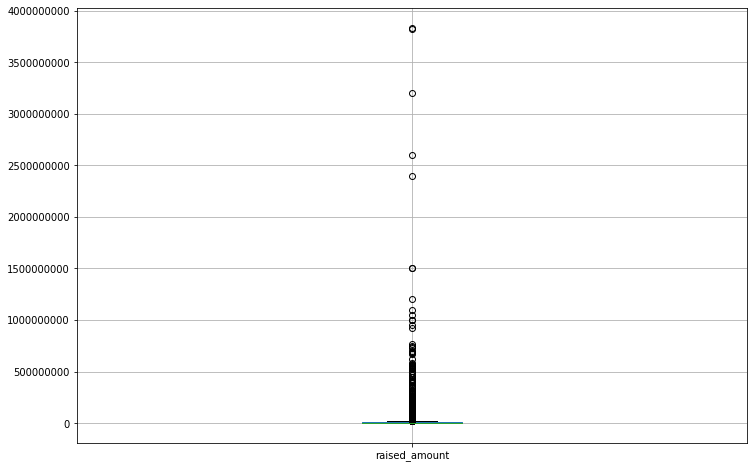

In [32]:
# Построим визуализцию распределения данных столбца raised_amount
company_and_rounds.boxplot(column = 'raised_amount', figsize = (12,8))
plt.yscale('linear')
plt.ticklabel_format(style='plain', axis='y')

Согласно полученной визуализации, распределение данных неравномерное, в столбце присутствуют экстремально высокие значения, которые, вероятнее всего, являются выбросами

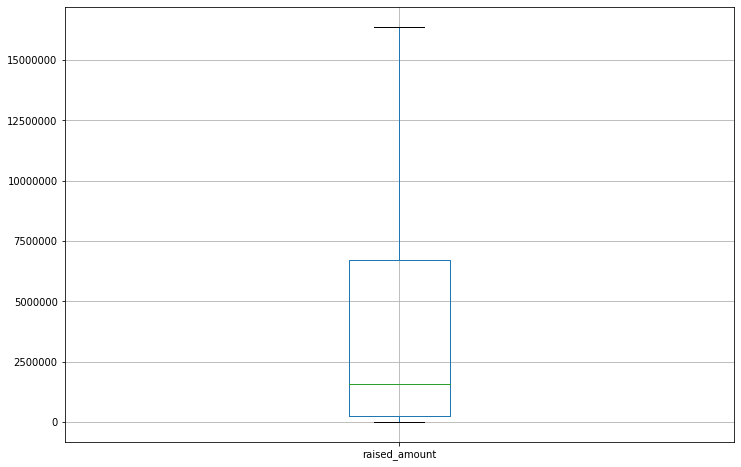

In [33]:
# Построим визуализцию распределения данных столбца raised_amount без учета выбросов
company_and_rounds.boxplot(column = 'raised_amount', figsize = (12,8), showfliers = False)
plt.yscale('linear')
plt.ticklabel_format(style='plain', axis='y')

Согласно полученным графикам, основной массив значений существенно ниже максимальных значений, в связи с этим дальнейший анализ следует проводить, минимизировав влияние выбросов

In [34]:
# Построим сводную таблицу распределения количества раундов и типичных размеров средств по годам
pivot_raised_amount = pd.pivot_table(company_and_rounds,
                                     index = 'year',
                                     aggfunc = {'raised_amount':'median',
                                                'funding_rounds':'sum'}
)
pivot_raised_amount['raised_amount'] = round(pivot_raised_amount['raised_amount'],2)

# Оставим инфо о годах, для которых есть данные о более чем 50 раундах
pivot_raised_amount = pivot_raised_amount.loc[pivot_raised_amount['funding_rounds']>50].reset_index()
display(pivot_raised_amount)

,year,funding_rounds,raised_amount
0,1998.0,72.0,100000.0
1,1999.0,268.0,2000000.0
2,2000.0,403.0,4200000.0
3,2001.0,302.0,3000000.0
4,2002.0,385.0,4200000.0
5,2003.0,569.0,3000000.0
6,2004.0,1057.0,5000000.0
7,2005.0,4157.0,5500000.0
8,2006.0,6295.0,5000000.0
9,2007.0,8494.0,3973320.0


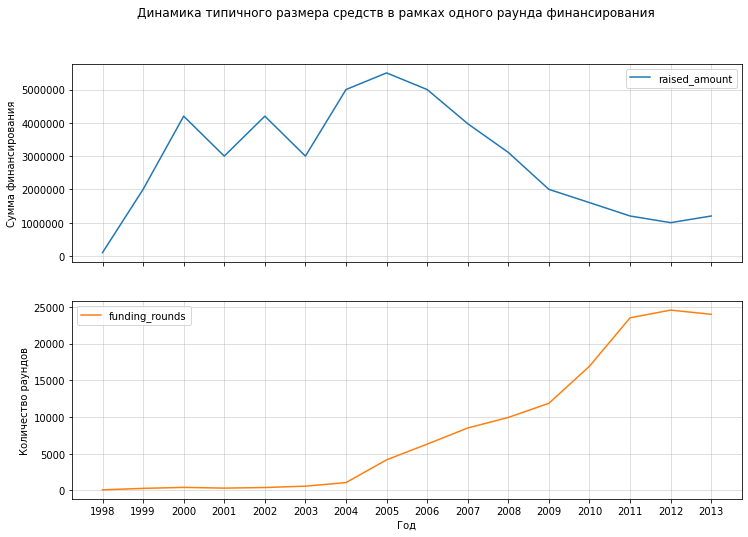

In [35]:
# Построим визуализацию полученных данных
subplot = pivot_raised_amount.plot(kind = 'line',
                        x = 'year',
                        y = ['raised_amount', 'funding_rounds'],
                        figsize = (12,8),
                        subplots = True,
                        sharex = 'year')
subplot[0].grid(alpha=0.5)
subplot[1].grid(alpha=0.5)
subplot[0].ticklabel_format(style = 'plain')
plt.suptitle('Динамика типичного размера средств в рамках одного раунда финансирования')
plt.xticks(range(int(pivot_raised_amount['year'].min()),int(pivot_raised_amount['year'].max() + 1)))
subplot[0].set_ylabel('Сумма финансирования')
subplot[1].set_ylabel('Количество раундов')
subplot[1].set_xlabel('Год')
plt.show()

Согласно полученным данным, максимальный размер средств в рамках одного раунда фиксируется в 2005 году (всего 5500000).
Типичная сумма раунда в 2013 году увеличилась по сравнению с предыдущим годом (1200000). Одновременно количество раундов, достигнув своего пика в 2012 году (24549), пошло на спад (23978).


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [36]:
# Создадим новый объединенный датасет
people_edu = people.merge(education, left_on = 'id', right_on = 'person_id', how = 'left')
people_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


Строк оказалось больше, чем в изначальном датасете people. Это говорит о том, что в поле id_x в результате присоединения появились дубли. Проверим и исключим дубли из дальнейшего анализа

In [37]:
# Проверим наличие дублей в столбце id_x
people_edu['id_x'].duplicated().sum()

40986

In [38]:
# Исключим дубли из датасета
people_edu = people_edu.drop_duplicates(subset = 'id_x') 
people_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              226708 non-null  int64         
 1   first_name        226703 non-null  object        
 2   last_name         226707 non-null  object        
 3   company_id        34614 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_y              68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 17.3+ MB


In [39]:
# Оценим полноту информации в датасете
people_edu.isna().sum()

id_x                     0
first_name               5
last_name                1
company_id          192094
network_username    187841
id_y                158637
person_id           158637
instituition        158677
graduated_at        190321
dtype: int64

In [40]:
# Выведем долю пропусков
people_edu.isna().mean()*100

id_x                 0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731902
network_username    82.855920
id_y                69.974152
person_id           69.974152
instituition        69.991796
graduated_at        83.949839
dtype: float64

Доля пропусков в столбце person_id составляет 70%. Это говорит о том, что данные в таблице education имеются только для 30% уникальных записей в таблице people. Также доля пропусков company_id, network_username является крайне высокой (85% и 83% соответственно). Такое количество пропусков может быть вызвано техническими причинами (например, поле для заполнения данных об образовании было необязательным). Заполнить такие данные расчетными показателями или информацией из внешних источников невозможно. Такое количество пропусков означает, что анализ данных о компаниях возможно провести только на 15% данных. Результаты такого анализа могут не отражать реальной картины по всей генеральной совокупности.

In [41]:
# Создадим столбец с наличием информации об образовании
people_edu['no_education_info'] = people_edu['instituition'].isna()
display(people_edu['no_education_info'])

0         False
1          True
2          True
3          True
4          True
          ...  
267689     True
267690    False
267691    False
267692     True
267693     True
Name: no_education_info, Length: 226708, dtype: bool

In [42]:
# Группируем по company_id и считаем для каждой компании:
# - общее число сотрудников count
# - число сотрудников без информации об образовании employees_no_education
company_people = people_edu.groupby('company_id').agg(count = ('id_x', 'count'), 
                                                      employees_no_education = ('no_education_info', 'sum')).reset_index()
display(company_people)

,company_id,count,employees_no_education
0,1.0,2,1
1,2.0,1,0
2,3.0,3,1
3,4.0,13,1
4,5.0,61,16
...,...,...,...
22916,285897.0,2,0
22917,285953.0,1,1
22918,285972.0,2,1
22919,285996.0,1,0


In [43]:
# Добавляем долю сотрудников без информации об образовании
company_people['no_education_ratio'] = company_people['employees_no_education'] / company_people['count']
display(company_people)

,company_id,count,employees_no_education,no_education_ratio
0,1.0,2,1,0.500000
1,2.0,1,0,0.000000
2,3.0,3,1,0.333333
3,4.0,13,1,0.076923
4,5.0,61,16,0.262295
...,...,...,...,...
22916,285897.0,2,0,0.000000
22917,285953.0,1,1,1.000000
22918,285972.0,2,1,0.500000
22919,285996.0,1,0,0.000000


In [44]:
# Проверим статистику по количеству сотрудников
company_people['count'].describe()

count    22921.000000
mean         1.510144
std          2.764379
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: count, dtype: float64

In [45]:
# Выведем данные о распределении сотрудников
abs_counts = company_people['count'].value_counts()
rel_counts = company_people['count'].value_counts(normalize=True)*100

# Объединим в один DataFrame
result = pd.DataFrame({
    'count': abs_counts,
    'proportion': rel_counts
}).reset_index().sort_values(by = 'index')

print(result)

    index  count  proportion
0       1  18116   79.036691
1       2   2709   11.818856
2       3    921    4.018149
3       4    450    1.963265
4       5    237    1.033986
5       6    138    0.602068
6       7    100    0.436281
7       8     59    0.257406
8       9     46    0.200689
10     10     25    0.109070
9      11     30    0.130884
12     12     16    0.069805
11     13     17    0.074168
13     14      8    0.034902
17     15      3    0.013088
15     16      4    0.017451
14     17      5    0.021814
19     18      3    0.013088
20     19      3    0.013088
18     20      3    0.013088
21     21      2    0.008726
22     22      2    0.008726
16     23      3    0.013088
24     25      2    0.008726
33     26      1    0.004363
25     29      2    0.008726
28     31      1    0.004363
38     32      1    0.004363
26     35      1    0.004363
36     36      1    0.004363
37     39      1    0.004363
27     47      1    0.004363
29     48      1    0.004363
31     51     

Согласно полученным данным, 79% всех компаний имеет всего одного сотрудника. Компании, имеющие более 25 сотрудников, представлены в единичном количестве.

In [48]:
# Разделим компании на группы
company_people['company_size'] = pd.cut(company_people['count'], bins = [0,1,5,10, 245], 
                                        labels = ['микро', 'малая', 'средняя', 'крупная'])
display(company_people)

,company_id,count,employees_no_education,no_education_ratio,company_size
0,1.0,2,1,0.500000,малая
1,2.0,1,0,0.000000,микро
2,3.0,3,1,0.333333,малая
3,4.0,13,1,0.076923,крупная
4,5.0,61,16,0.262295,крупная
...,...,...,...,...,...
22916,285897.0,2,0,0.000000,малая
22917,285953.0,1,1,1.000000,микро
22918,285972.0,2,1,0.500000,малая
22919,285996.0,1,0,0.000000,микро


В основу распределения по группа был положен принцип сохранение наиболее равного представительства компаний

In [49]:
# Выведем инфо о полученных группах
group_info = company_people.groupby('company_size')['company_id'].count()
display(group_info)

company_size
микро      18116
малая       4317
средняя      368
крупная      120
Name: company_id, dtype: int64

In [50]:
# Выведем средние доли сотрудников без информации об образовании в зависимости от компании  
no_education = company_people.groupby('company_size')['no_education_ratio'].mean()*100
display(no_education)

company_size
микро      46.312652
малая      47.635704
средняя    53.182798
крупная    42.914394
Name: no_education_ratio, dtype: float64

Наибольшая доля сотрудников без инфо об образовании приходится на организации среднего размера (6-10 сотрудников). В таких организациях средняя доля сотрудников без инфо об образовании равна 53%. Самая низкая доля сотрудников без инфо об образовании приходится на крупные компании (от 11 до 245 сотрудников). Средняя доля таких сотрудников равна 43%. Однако важно учитывать, что полученные результаты отражают 17% данных всего датасета, в связи с чем те же показатели по всему датасету могут отличаться. Также важно учитывать неравномерное распределение данных по группам. 

In [51]:
# Скоректируем тип столбца object_id для присоединения к датасету
degrees['object_id'] = degrees['object_id'].str.replace('p:', '').astype('int64')

In [52]:
# Создадим новый объединенный датасет
people_edu_degree = people_edu.merge(degrees, left_on = 'id_x', right_on = 'object_id', how = 'left')
people_edu_degree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267693 entries, 0 to 267692
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_x               267693 non-null  int64         
 1   first_name         267688 non-null  object        
 2   last_name          267692 non-null  object        
 3   company_id         44788 non-null   float64       
 4   network_username   50775 non-null   object        
 5   id_y               109056 non-null  float64       
 6   person_id          109056 non-null  float64       
 7   instituition       109006 non-null  object        
 8   graduated_at       58783 non-null   datetime64[ns]
 9   no_education_info  267693 non-null  bool          
 10  id                 109056 non-null  float64       
 11  object_id          109056 non-null  float64       
 12  degree_type        97886 non-null   object        
 13  subject            80890 non-null   object  

In [53]:
#Удалим дубли
people_edu_degree = people_edu_degree.drop_duplicates(subset = 'id_x') 
people_edu_degree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 267692
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_x               226708 non-null  int64         
 1   first_name         226703 non-null  object        
 2   last_name          226707 non-null  object        
 3   company_id         34614 non-null   float64       
 4   network_username   38867 non-null   object        
 5   id_y               68071 non-null   float64       
 6   person_id          68071 non-null   float64       
 7   instituition       68031 non-null   object        
 8   graduated_at       36387 non-null   datetime64[ns]
 9   no_education_info  226708 non-null  bool          
 10  id                 68071 non-null   float64       
 11  object_id          68071 non-null   float64       
 12  degree_type        61401 non-null   object        
 13  subject            50808 non-null   object  

In [54]:
# Проверим количество пропусков
people_edu_degree.isna().sum()

id_x                      0
first_name                5
last_name                 1
company_id           192094
network_username     187841
id_y                 158637
person_id            158637
instituition         158677
graduated_at         190321
no_education_info         0
id                   158637
object_id            158637
degree_type          165307
subject              175900
dtype: int64

In [55]:
# Проверим количество пропусков
people_edu_degree.isna().mean()*100

id_x                  0.000000
first_name            0.002205
last_name             0.000441
company_id           84.731902
network_username     82.855920
id_y                 69.974152
person_id            69.974152
instituition         69.991796
graduated_at         83.949839
no_education_info     0.000000
id                   69.974152
object_id            69.974152
degree_type          72.916262
subject              77.588793
dtype: float64

Таблицу degree можно присоединить к объединенному ранее датасету people_edu, однако процент пропусков так же, как и в случае с таблицей education, является высоким (70%). Проценты пропусков в основных столбцах с данными составляют 73% и 77%. Использование для анализа данных с таким количеством пропусков может дать картину, не отражающую реальные показатели по всей генеральной совокупности.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец network_username встречается в 2 датасетах: company_and_rounds и people. Проверим уникальность этих столбцов в каждом датасете, а также частоту дублировния информации ли для разных датасетов в столбцах с таким названием.

In [56]:
# Проверим уникальность значений в столбце network_username датасета company_and_rounds
string_1 = company_and_rounds.shape[0]
print(f'Общее количество строк датасета company_and_rounds: {string_1}')

count_1 = company_and_rounds['network_username'].count()
print(f'Общее количество ненулевых значений в столбце network_username датасета company_and_rounds: {count_1}')

uniq_1 = company_and_rounds['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username датасета company_and_rounds: {uniq_1}')

dupl_1 = count_1 - uniq_1
print(f'Количество дублей в столбце network_username датасета company_and_rounds: {dupl_1}')

string_per_1 = round(count_1 / string_1 * 100, 2)
print(f'Доля строк в столбце network_username от общего количества значений датасета company_and_rounds: {string_per_1}%')

dupl_per_1 = round(dupl_1 / count_1 * 100, 2)
print(f'Процент дублей в столбце network_username датасета company_and_rounds от общего количества значений: {dupl_per_1}%')

Общее количество строк датасета company_and_rounds: 217774
Общее количество ненулевых значений в столбце network_username датасета company_and_rounds: 95534
Количество уникальных значений в столбце network_username датасета company_and_rounds: 79374
Количество дублей в столбце network_username датасета company_and_rounds: 16160
Доля строк в столбце network_username от общего количества значений датасета company_and_rounds: 43.87%
Процент дублей в столбце network_username датасета company_and_rounds от общего количества значений: 16.92%


In [57]:
# Проверим уникальность значений в столбце network_username датасета people
string_2 = people.shape[0]
print(f'Общее количество строк датасета people: {string_2}')

count_2 = people['network_username'].count()
print(f'Общее количество ненулевых значений в столбце network_username датасета people: {count_2}')

uniq_2 = people['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username датасета people: {uniq_2}')

dupl_2 = count_2 - uniq_2
print(f'Количество дублей в столбце network_username датасета people: {dupl_2}')

string_per_2 = round(count_2 / string_2 * 100, 2)
print(f'Доля строк в столбце network_username от общего количества значений датасета people: {string_per_2}%')

dupl_per_2 = round(dupl_2 / count_2 * 100, 2)
print(f'Процент дублей в столбце network_username датасета people от общего количества значений: {dupl_per_2}%')

Общее количество строк датасета people: 226709
Общее количество ненулевых значений в столбце network_username датасета people: 38867
Количество уникальных значений в столбце network_username датасета people: 38384
Количество дублей в столбце network_username датасета people: 483
Доля строк в столбце network_username от общего количества значений датасета people: 17.14%
Процент дублей в столбце network_username датасета people от общего количества значений: 1.24%


Оба столбца содержат большое количество пропусков относительно всего датафрейма, при объединении такие пропуски необходимо удалить, в результате значительная часть данных будет потеряна.  
Оба столбца содержат большое количество дубликатов, в связи с этим, в исходном виде не подходят в качестве ключа для объединения датасетов. Для объединения датасетов по столбцу network_username необходимо очистить данные в двух датасетах от дублей, что также означает потерю данных.

In [58]:
# Создадим копии датасетов для тестового объединения и удаления данных
company_and_rounds_2 = company_and_rounds.copy()
people_2 = people.copy()

In [59]:
# Очистим столбцы датасетов от дублей для объединения и проверки количества совпадающих значений
company_and_rounds_2['network_username'] = company_and_rounds_2.drop_duplicates(subset = 'network_username')
people_2['network_username'] = people_2.drop_duplicates(subset = 'network_username')

In [60]:
# Очистим столбцы датасетов от пропусков для объединения и проверки количества совпадающих значений
company_and_rounds_2 = company_and_rounds_2.dropna(subset=['network_username'])
people_2 = people_2.dropna(subset=['network_username'])


In [61]:
# Создадим новый объединенный датасет
new_df = company_and_rounds_2.merge(people_2, on = 'network_username', how = 'inner')

In [62]:
# Выведем информацию о количестве и соотношении строк нового датасета с исходными датасетами
new_df_string = new_df['network_username'].nunique()
print(f'Количество строк в новом датасете (количество совпадений значений столбцов network_username): {new_df_string}')

new_df_per_1 = round(new_df_string / string_1 * 100, 2)
print(f'Доля строк, сохранившихся в новом датасете, от общего количества значений датасета company_and_rounds: {new_df_per_1}%')

new_df_per_2 = round(new_df_string / string_2 * 100, 2)
print(f'Доля строк, сохранившихся в новом датасете, от общего количества значений датасета people: {new_df_per_2}%')

Количество строк в новом датасете (количество совпадений значений столбцов network_username): 11105
Доля строк, сохранившихся в новом датасете, от общего количества значений датасета company_and_rounds: 5.1%
Доля строк, сохранившихся в новом датасете, от общего количества значений датасета people: 4.9%


Анализ данных столбцов network_username в датасетах company_and_rounds и people показал, что объединение датасетов по данным столбцам влечет за собой существенную потерю данных. При объединении по столбцу network_username от исходных датасетов остается порядка 5% данных (5.1% от датасета company_and_rounds, 4.9% от датасета people). Данный столбец не следует использовать для объединения датасетов.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [64]:
# Выведем инфо о датасете
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Исходя из структуры данных, вероятнее всего, данные о компаниях и данные о раундах хранились в разных таблицах. Об этом говорит количество данных, зависящее от тематики столбца (столбцы company_id, name, category_code, status, founded_at,  closed_at, domain, network_username, country_code, investment_rounds, funding_rounds, funding_total, milestones - данные о компании, для большинства столбцов количество данных 217427. Столбцы funding_round_id, company_id_2, funded_at, funding_round_type, raised_amount, pre_money_valuation,  participants, is_first_round, is_last_round - данные о раундах, для большинства столбцов количество данных составляет 52928).  
Неравномерное распределение данных, большое количество пропусков, дублирование столбца company_id может являться результатом объединения таблиц.  
Также анализ показывает, что общее количество строк датасета (217774) отличается от количества значений в столбце company_id (217472), что также может указывать на объединение таблиц.  

Сам датасет проверен ранее на наличие дубликатов, пропущенных значений, соответствие форматов данных. Дубликатов в датасете не было обнаружено, типы данных заменены на соответствующие.


In [65]:
# Разделим датасет на два 
companies_df = company_and_rounds.iloc[:, :13]
rounds_df = company_and_rounds.iloc[:, 13:]

In [66]:
#Проверим датасеты на дубликаты
for df in [companies_df, rounds_df]:
    display(df.duplicated().sum())

21220

164845

In [67]:
# Удалим дубли из датасетов
companies_df = companies_df.drop_duplicates()
rounds_df = rounds_df.drop_duplicates()

In [68]:
# Выведем инфо об обновленных датасетах
for df in [companies_df, rounds_df]:
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52929 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_2         52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   year                 52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


None


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [75]:
#Отфильтруем необходимые компании
companies_df_2 = companies_df[(companies_df['funding_rounds'] > 0)|(companies_df['investment_rounds'] > 0)|(companies_df['status'] == 'acquired')]
companies_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

In [76]:
# Проверим таблицу на дубли
companies_df_2.duplicated().sum()

0

In [77]:
# Проверим пропуски в таблице
companies_df_2.isna().sum()

company_id               0
name                     0
category_code         5432
status                   0
founded_at           12940
closed_at            38619
domain                4993
network_username     19897
country_code          6005
investment_rounds        0
funding_rounds           0
funding_total            0
milestones               0
dtype: int64

In [78]:
# Проверим пропуски в таблице
companies_df_2.isna().mean()*100

company_id            0.000000
name                  0.000000
category_code        13.331043
status                0.000000
founded_at           31.756939
closed_at            94.777530
domain               12.253663
network_username     48.830589
country_code         14.737281
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

Типы данных в таблице соответствуют, явных дублей в таблице не найдено, наибольшее количество пропусков в столбцах closed_at (95%), network_username(49%), founded_at(32%).


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [79]:
# Проверим данные по столбцу funding_total
companies_df_2['funding_total'].describe(percentiles = [.25, .5, .75, .99]).map('{:.0f}'.format)

count         40747
mean       10135610
std        56464360
min               0
25%               0
50%          600000
75%         5650650
99%       133948660
max      5700000000
Name: funding_total, dtype: object

Для полученных данных характерно неравномерное распределение с наличием экстремально высоких значений (максимальное значение в наборе данных равно 5700000000). Вероятнее всего, такие значения являются выбросами. Также среднее (10135610) значительно выше медианы (600000), а стандартное отклонение имеет очень высокое значение, что говорит о перекосе данных (правую сторону), а также о сильном разбросе значений. В качестве определения наиболее типичного значения для таких данных лучше использовать менее чувствительную к выбросам медиану. Важно отметить, что порядка 25% всех значений имеют сумму 0. Это могут быть компании, получившие финансирование каким-либо иным способом. Также проверка 99 процентиля показала наиболее вероятную верхнюю границу значений - 133948660. 99% всех сумм меньше этого числа. Значения, превышающие 133948660, вероятнее всего, выбросы. 

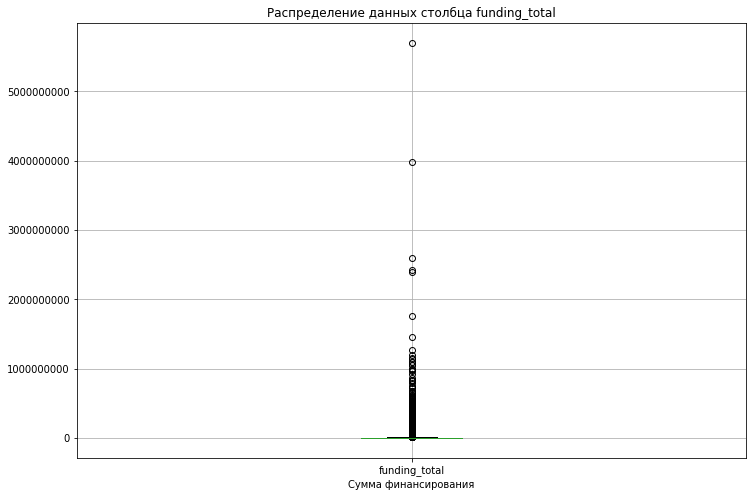

In [80]:
# Построим визуализцию распределения данных столбца funding_total без учета выбросов
companies_df_2.boxplot('funding_total', figsize = (12, 8))
plt.yscale('linear')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Сумма финансирования')
plt.title('Распределение данных столбца funding_total')
plt.show()

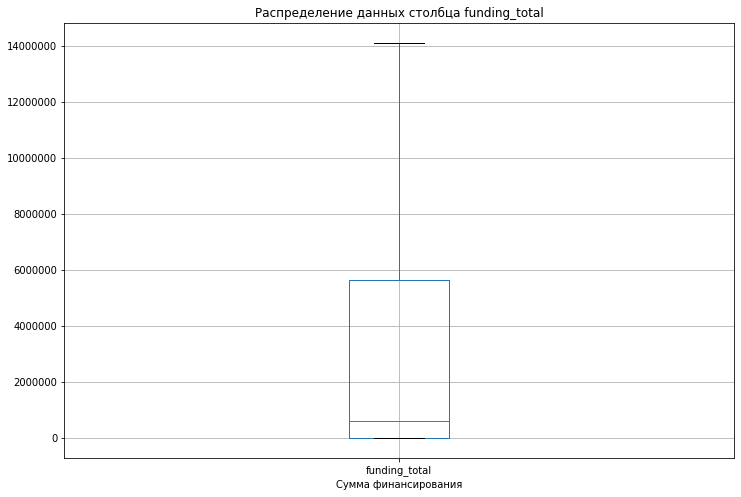

In [81]:
# Построим визуализцию распределения данных столбца funding_total без учета выбросов
companies_df_2.boxplot(column = 'funding_total', figsize = (12,8), showfliers = False)
plt.yscale('linear')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Сумма финансирования')
plt.title('Распределение данных столбца funding_total')
plt.show()

Построенные диаграммы в виде "ящиков с усами" подтверждают предположение о неравномерном распределении данных и о выбросах. Наиболее типичным (медианным) значением суммы финансирования является значение 600000.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [82]:
# Объединим датасет companies_df и acquisition
new_df = companies_df_2.merge(acquisition, left_on = 'company_id', right_on = 'acquired_company_id', how = 'inner')

In [83]:
# Отфильтруем необходимые компании
price_df = new_df[(new_df['price_amount'] < 2)&(new_df['funding_total'] != 0)]
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 7 to 9386
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   float64       
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   float64       
 10  funding_rounds        1618 non-null   float64       
 11  funding_total         1618 non-null   float64       
 12  milestones            1618 non-null   float64       
 13  id                

In [84]:
# Выведем статистику для суммы финансирования компаний стоимостью 0 и 1 доллар
price_df['funding_total'].describe().map('{:.0f}'.format)

count          1618
mean       18152962
std       144503027
min            3750
25%         2000000
50%         6000000
75%        15500000
max      5700000000
Name: funding_total, dtype: object

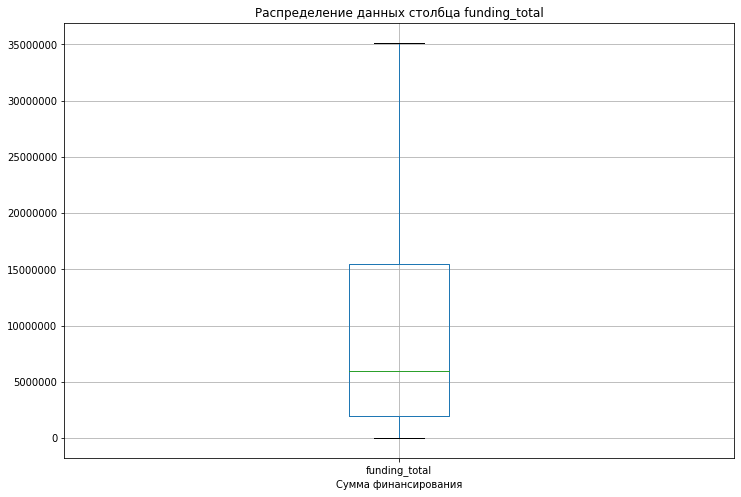

In [85]:
# Построим визуализцию распределения данных столбца funding_total без учета выбросов
price_df.boxplot(column = 'funding_total', figsize = (12,8), showfliers = False)
plt.yscale('linear')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Сумма финансирования')
plt.title('Распределение данных столбца funding_total')
plt.show()

Всего в датасете представлено 1618 компаний со стоимостью 0 или 1 доллар. Объем финансирования таких компаний неравномерен и варьируется от 3750 до 5700000000. Вероятнее всего, данные по столбцу с суммой финансирования имеют выбросы. Наиболее типичное (медианное) значение равно 6000000. Среднее значение существенно выше - 18152962, что говорит о перекосе данных в првую сторону. 

In [86]:
# Рассчитаем границы выбросов по столбцу funding_total на основе описательной статистики
Q1 = 2000000
Q3 = 15500000
IQR = Q3 - Q1 # определим межквартильный размах
lower_border = Q1 - 1.5*IQR # определим нижнюю границу выбросов
upper_border = Q3 + 1.5*IQR # определим верхнюю границу выбросов
print(f'Нижняя граница выбросов: {lower_border}')
print(f'Верхняя граница выбросов: {upper_border}')

Нижняя граница выбросов: -18250000.0
Верхняя граница выбросов: 35750000.0


In [87]:
# Найдем процентиль для полученного значения нижней границы
percentile = (price_df['funding_total'] <= 0).mean() * 100
print(f"Процентиль для {0}: {percentile:.1f}%")

Процентиль для 0: 0.0%


In [88]:
# Найдем процентиль для полученного значения нижней границы
percentile = (price_df['funding_total'] <= 35750000.0).mean() * 100
print(f"Процентиль для {35750000.0}: {percentile:.1f}%")

Процентиль для 35750000.0: 90.9%


Согласно полученным расчетным результатам, нижняя граница выбросов соответсвует -18250000. Однако, граница выбросов для столбца с суммой финансирования не может быть меньше нуля. Также это подтверждает визулизация распределения данных выше. В связи с этим, за нижнюю границу выбросов следует считать 0, что соответствует 0 процентилю. Верхняя грница выбросов равна 35750000, что соответствует 90.9%


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [90]:
# Подготовим датасет для работы с ценами стартапов
# Исключим компании со стоимостью 0 или 1
startaps_df = new_df[new_df['price_amount'] > 2]
startaps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 0 to 9389
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            2470 non-null   float64       
 1   name                  2470 non-null   object        
 2   category_code         1997 non-null   object        
 3   status                2470 non-null   object        
 4   founded_at            1455 non-null   datetime64[ns]
 5   closed_at             12 non-null     datetime64[ns]
 6   domain                1992 non-null   object        
 7   network_username      652 non-null    object        
 8   country_code          1958 non-null   object        
 9   investment_rounds     2470 non-null   float64       
 10  funding_rounds        2470 non-null   float64       
 11  funding_total         2470 non-null   float64       
 12  milestones            2470 non-null   float64       
 13  id                

In [91]:
# Выведем статистику о ценах
startaps_df['price_amount'].describe()

count    2.470000e+03
mean     1.497793e+09
std      5.233613e+10
min      1.100000e+01
25%      1.292500e+07
50%      5.645000e+07
75%      2.650000e+08
max      2.600000e+12
Name: price_amount, dtype: float64

In [92]:
# Сгруппруем компании по категории деятельности 
startaps_group = startaps_df.groupby('category_code')['price_amount'].agg(['median', 'std']).reset_index()
startaps_group = startaps_group.dropna(subset = ['std']) #удалим строки, в которых отсутствует различие между ценами
pd.set_option('display.float_format', '{:.0f}'.format)
display(startaps_group) 

,category_code,median,std
0,advertising,60000000,495483858
1,analytics,200000000,92967736
2,automotive,2400000000,2581669292
3,biotech,200000000,1968195264
4,cleantech,185000000,874419628
5,consulting,32150000,1018108962
6,ecommerce,157500000,281425549
7,education,16250000,288329371
8,enterprise,54750000,241358098251
9,fashion,195000000,86494219


In [93]:
# Выведем описательную статистику для полученных данных
startaps_group.describe()

,median,std
count,35,35
mean,196435714,7899841021
std,402510264,40641209170
min,4860000,62952859
25%,55750000,284877460
50%,100000000,695440501
75%,178250000,1348956830
max,2400000000,241358098251


Для определения категорий компаний одновременно с наиболее высокими ценами и наиболее высоким разбросом цен за стартап предлагается работать с выборкой категорий компаний, для которых значения медианы и стандартного отклонения выше 50% среди всех показателей по категориям. Компании, у которых эти значения соответствуют двум критериям сразу, составят рейтинг.  

In [94]:
# Оставим в наборе данных только категории, для которых значение медианы и стандаритного отклонения выше 50 процентиля 
top_categories = startaps_group[(startaps_group['median'] > 100000000)&(startaps_group['std'] > 695440501)]
display(top_categories)

,category_code,median,std
2,automotive,2400000000,2581669292
3,biotech,200000000,1968195264
4,cleantech,185000000,874419628
10,finance,171500000,1052920129
13,health,140000000,1927099525
16,manufacturing,351000000,1060434506
26,public_relations,110000000,6854337756
27,real_estate,400000000,2676302206
29,security,164500000,1378442023


Таким образом, в рейтинг топ-9 категорий стартапов с наиболее высокой ценой и наибольшим разбросом цен вошли категории компаний, для которых значение медианы и значение стандартного отклонения одновременно выше значения 50% среди всех категорий. Перечень категорий включает:  
1. **automotive**  
2. **biotech**  
3. **cleantech**  
4. **finance**  
5. **health**  
6. **manufacturing**  
7. **public_relations**  
8. **real_estate**  
9. **security**



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Для анализа возьмем датасет companies_df, в котором содержится изначальная информация о всех возможных статусах стартапа.

In [95]:
# Выведем статистику по столбцу funding_rounds
companies_df['funding_rounds'].describe()

count   196553
mean         0
std          1
min          0
25%          0
50%          0
75%          0
max         15
Name: funding_rounds, dtype: float64

Минимальное количество значений в столбце равно 0, максимальное - 15. Важно отметить, что больше 75% всех значений столбца равны 0, следовательно, подавляющее большинство стартапов не имеют раундов.

In [96]:
# Выведем среднее количество раундов по статусам
rounds = companies_df.groupby('status')['funding_rounds'].mean()
pd.set_option('display.float_format', '{:.2f}'.format)
display(rounds)

status
acquired    0.52
closed      1.12
ipo         1.09
operating   0.24
Name: funding_rounds, dtype: float64

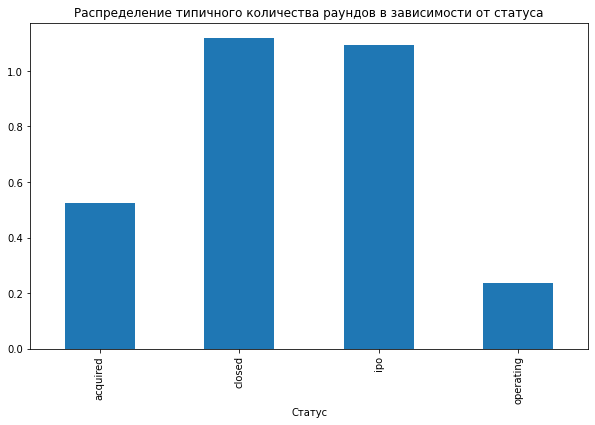

In [97]:
# Визуализируем полученные данные
rounds.plot(kind = 'bar', figsize = (10,6))
plt.title('Распределение типичного количества раундов в зависимости от статуса')
plt.xlabel('Статус')
plt.show()

Согласно полученным данным, для стартапов со статусами acquired, operating характерно отсутствие раундов (среднее количество раундов равно 0). Для стартапов со статусами ipo, closed среднее количество раундов равно 1.


## Шаг 4. Итоговый вывод и рекомендации


### Общий обзор проделанной работы

В работу были взяты 5 датасетов: company_and_rounds, acquisition, people, education, degrees. 
Датасеты были проверены на предмет наличия пропусков, дублей, соответствия типов данных, были оценены объемы и полнота данных датасетов. В результате:
1. Были изменены типы данных на соответствующие
2. Были выявлены столбцы с пропусками и определено их количество в каждом датасете
3. Датасеты были проверены на наличие явных и неявных дублей  
4. Названия столбцов датасетов были приведены к единому стилю написания  

После предобработки был проведен исследовательский анализ данных, включающий статистический анализ данных с созданием соответствующих визуализаций.

### Ответы на исследовательские вопросы. Главные выводы

В ходе исследовательского анализа данных:

1. были определены наиболее оптимальные столбцы для объединения данных, также проверены возможности объединения датасетов. Наиболее удачным для объединенения определен столбец company_id. 

2. были проверены данные о сотрудниках и их образовании. Был сделан вывод о недостаточном количестве данных о сотрудниках компаний и их уровне образования - ввиду недостатка данных информация о сотрдуниках и их образовании практически не привязана к конкретной компании. В связи с этим выявленные на основе имеющихся данных показатели могут не отражать реальной картины по всему объему данных.  

3. был выявлен наиболее типичный (медианный) размер суммы финансирования одной компании - 600000.

4. встретилось значительное количество сделок со стоимостью 0 и 1 доллар. Можно предположить, что такие стоимости сделок могут быть связаны с одним или несколькимииз следующих факторов: реорганизации внутри холдингов, смена юридической формы, спасение компаний с долгами, скрытые условия оплаты (акции, роялти).  

5. был составлен рейтинг топ-9 категорий стартапов с наиболее высокой ценой и наибольшим разбросом цен. В рейтинг вошли категории компаний, для которых значение медианы и значение стандартного отклонения одновременно выше значения 50% среди всех категорий. Перечень категорий включает:  
- **automotive**  
- **biotech**  
- **cleantech**  
- **finance**  
- **health**  
- **manufacturing**  
- **public_relations**  
- **real_estate**  
- **security**  

Диапазон типичных цен по выделенным категориям варьируется от 110000000 до 2400000000


### Рекомендации на основе анализа данных

1. Для более детальных ответов на вопросы о причинах появления сделок со стоимостью 0 и 1 доллар следует проверсти анализ связи таких компаний со статусом стартапа, изучить варианты расчёта, а также рекомендуется сопроводить исследование на основе данных изучением внешних источников на предмет публикаций информации об интересующих компаниях.

2. Наиболее перспективными с точки зрения получения потенциально высоких доходов явлюятся следующие категории стартапов: **automotive**, **biotech**, **cleantech**, **finance**, **health**, **manufacturing**, **public_relations**, **real_estate**, **security**. Однако стартапы в этих категориях требуют наиболее высоких инвестиций и храктеризуются наибольшим риском. 